In [2]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import numpy as np

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv("EV_correlations.txt")

In [5]:
df.head()

,EV_Value,Win_Rate
0,1.906750,0.81974
1,4.115870,0.89718
2,1.879090,0.57586
3,1.073830,0.43490
4,0.948198,0.34568


In [6]:
df.shape

(20000, 2)

In [7]:
df.columns

Index(['EV_Value', 'Win_Rate'], dtype='object')

In [54]:
import matplotlib.pyplot as plt

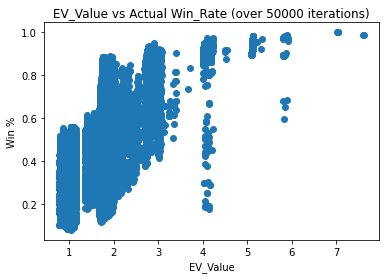

In [9]:
plt.scatter(df.EV_Value, df.Win_Rate)
plt.title("EV_Value vs Actual Win_Rate (over 50000 iterations)")
plt.xlabel('EV_Value')
plt.ylabel('Win %')
plt.show()

In [10]:
test = np.asarray(df.iloc[range(100*i,100*i + 100)])
test[:,0]

NameError: name 'i' is not defined

In [ ]:
data_condensed_EV = []
data_condensed_win = []
sum_EV = 0
sum_win = 0
count = 0
interval = int(df.shape[0]/25)
for i in range(interval):
    data_condensed_EV.append((np.asarray(df.iloc[range(25*i,25*i + 25)])[:,0]).mean())
    data_condensed_win.append((np.asarray(df.iloc[range(25*i,25*i + 25)])[:,1]).mean())


In [ ]:
data_condensed_EV

In [ ]:
straight_flush = pd.DataFrame((df[df.EV_Value >=8]))

four_of_kind = pd.DataFrame(df[df.EV_Value >=7])
four_of_kind  = pd.DataFrame(four_of_kind[four_of_kind.EV_Value <8])

full_house = pd.DataFrame(df[df.EV_Value >=6])
full_house  = pd.DataFrame(full_house[full_house.EV_Value <7])

flush = pd.DataFrame(df[df.EV_Value >=5])
flush  = pd.DataFrame(flush[flush.EV_Value <6])

straight = pd.DataFrame(df[df.EV_Value >=4])
straight  = pd.DataFrame(straight[straight.EV_Value <5])

three_of_kind = pd.DataFrame(df[df.EV_Value >=3])
three_of_kind  = pd.DataFrame(three_of_kind[three_of_kind.EV_Value <4])

two_pair = pd.DataFrame(df[df.EV_Value >=2])
two_pair  = pd.DataFrame(two_pair[two_pair.EV_Value <3])

one_pair = pd.DataFrame(df[df.EV_Value >=1])
one_pair  = pd.DataFrame(one_pair[one_pair.EV_Value <2])


high_card = pd.DataFrame(df[df.EV_Value <1])


In [ ]:

plt.scatter(high_card.EV_Value, high_card.Win_Rate)
plt.title('High Card')

In [ ]:
plt.scatter(one_pair.EV_Value, one_pair.Win_Rate)
plt.title('one_pair')

In [ ]:
plt.scatter(two_pair.EV_Value, two_pair.Win_Rate)
plt.title('two_pair')

In [ ]:
plt.scatter(three_of_kind.EV_Value, three_of_kind.Win_Rate)
plt.title('three_of_kind')

In [ ]:
plt.scatter(straight.EV_Value, straight.Win_Rate)
plt.title('straight')

In [ ]:
plt.scatter(flush.EV_Value, flush.Win_Rate)
plt.title('flush')

In [ ]:
plt.scatter(full_house.EV_Value, full_house.Win_Rate)
plt.title('full_house')

In [ ]:
plt.scatter(four_of_kind.EV_Value, four_of_kind.Win_Rate)
plt.title('four_of_kind')

In [ ]:
plt.scatter(straight_flush.EV_Value, straight_flush.Win_Rate)
plt.title('straight_flush')

In [ ]:
df.head()

In [ ]:
(np.asarray(df.EV_Value)).max()

In [ ]:
win_rate_buckets = []
for i in range(40):
    buckets = pd.DataFrame(df[df.EV_Value >= (i * 0.2)])
    buckets = pd.DataFrame(buckets[buckets.EV_Value <((i+1)* 0.2)])
    win_rate_buckets.append((np.asarray(buckets.Win_Rate)).mean())

In [ ]:
win_rate_buckets

In [ ]:
intervals = np.asarray(range(40))

plt.bar(intervals *0.2, win_rate_buckets, width = 0.15)
plt.title("EV Value vs Win rate")
plt.xlabel("EV value")
plt.ylabel("win rate")

In [ ]:
lower_rate_buckets = []
for i in range(20):
    buckets = pd.DataFrame(df[df.EV_Value >= (i * 0.2)])
    buckets = pd.DataFrame(buckets[buckets.EV_Value <((i+1)* 0.2)])
    lower_rate_buckets.append((np.asarray(buckets.Win_Rate)).mean())

In [ ]:
lower_rate_buckets

In [ ]:
plt.bar((np.asarray(range(20))*0.2), lower_rate_buckets, width = 0.15)
plt.title("EV Value vs Win rate")
plt.xlabel("EV value")
plt.ylabel("win rate")

In [ ]:
df_lower = pd.DataFrame(df[df.EV_Value <=4])

In [ ]:
df_lower.shape

In [ ]:
EV_Values = (np.asarray(df_lower.EV_Value)).reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(EV_Values, df_lower.Win_Rate, test_size = 0.2, random_state = 42)

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)

In [ ]:
LR.score(X_test,y_test)

In [13]:
df_new = pd.read_csv("EV_new_correlations.txt")

In [14]:
df_new

,EV,win_rate
0,0.598156,0.81932
1,0.743758,0.89804
2,0.483846,0.57604
3,0.350145,0.43400
4,0.336299,0.34580
...,...,...
19995,0.473816,0.64316
19996,0.314353,0.33732
19997,0.489648,0.29204
19998,0.379183,0.18552


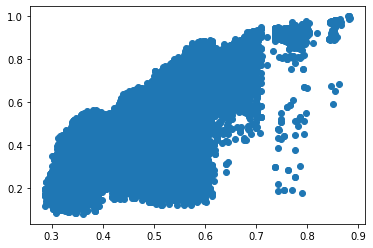

In [15]:
plt.scatter(df_new.EV, df_new.win_rate)

In [19]:
X_train_adjusted, X_test_adjusted, y_train_adjusted, y_test_adjusted = train_test_split(np.asarray(df_new.EV).reshape(-1,1), df_new.win_rate, test_size = 0.2)

In [21]:
LR = LinearRegression()
LR.fit(X_train_adjusted, y_train_adjusted)

LinearRegression()

In [23]:
LR.score(X_test_adjusted, y_test_adjusted)

0.5873405652239606

In [24]:
EV_log = np.log(np.asarray(df_new.EV))

In [44]:
df_new_log = df_new
df_new_log["EV_log"] = EV_log

In [45]:
df_new_log

,EV,win_rate,EV_log
0,0.598156,0.81932,-0.513904
1,0.743758,0.89804,-0.296040
2,0.483846,0.57604,-0.725989
3,0.350145,0.43400,-1.049408
4,0.336299,0.34580,-1.089755
...,...,...,...
19995,0.473816,0.64316,-0.746936
19996,0.314353,0.33732,-1.157239
19997,0.489648,0.29204,-0.714069
19998,0.379183,0.18552,-0.969736


In [46]:
df_new


,EV,win_rate,EV_log
0,0.598156,0.81932,-0.513904
1,0.743758,0.89804,-0.296040
2,0.483846,0.57604,-0.725989
3,0.350145,0.43400,-1.049408
4,0.336299,0.34580,-1.089755
...,...,...,...
19995,0.473816,0.64316,-0.746936
19996,0.314353,0.33732,-1.157239
19997,0.489648,0.29204,-0.714069
19998,0.379183,0.18552,-0.969736


In [28]:
df_new_log_train = df_new_log.drop(["win_rate"], axis = 1)

In [29]:
X_train_adj_log, X_test_adj_log, y_train_adj_log, y_test_adj_log = train_test_split(df_new_log_train, df_new_log.win_rate, test_size = 0.2)

In [33]:
LR_adj_log = LinearRegression()
LR_adj_log.fit(X_train_adj_log, y_train_adj_log)

LinearRegression()

In [34]:
LR_adj_log.score(X_test_adj_log, y_test_adj_log)

0.6122399726362411

In [35]:
LR_adj_log.coef_

array([0.91468035, 0.21635275])

In [47]:
df_new_under_4 = df_new[df_new.EV < 0.7]

In [48]:
df_new_under_4

,EV,win_rate,EV_log
0,0.598156,0.81932,-0.513904
2,0.483846,0.57604,-0.725989
3,0.350145,0.43400,-1.049408
4,0.336299,0.34580,-1.089755
5,0.382169,0.35716,-0.961892
...,...,...,...
19995,0.473816,0.64316,-0.746936
19996,0.314353,0.33732,-1.157239
19997,0.489648,0.29204,-0.714069
19998,0.379183,0.18552,-0.969736


In [49]:
df_new_under_4_train = df_new_under_4.drop(['win_rate'], axis = 1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df_new_under_4_train, df_new_under_4.win_rate, test_size = 0.2)

In [51]:
LR_under_4 = LinearRegression()
LR_under_4.fit(X_train, y_train)

LinearRegression()

In [52]:
LR_under_4.score(X_test, y_test)

0.551058745938207

In [53]:
LR_under_4.coef_

array([1.0461289 , 0.15531367])

In [34]:
df_full = pd.read_csv("EV_full_correlations.txt")

In [35]:
df_full

,1_value,2_value,3_value,4_value,5_value,EV,max_suit,win_rate
0,0,3,8,11,11,0.598156,3,0.83796
1,0,0,0,2,5,0.743758,3,0.21632
2,0,2,2,4,12,0.483846,3,0.54616
3,0,1,3,7,11,0.350145,3,0.39612
4,0,4,5,6,10,0.336299,2,0.36404
...,...,...,...,...,...,...,...,...
19995,1,3,3,7,9,0.473816,2,0.34064
19996,0,1,2,8,10,0.314353,2,0.34124
19997,0,0,2,3,4,0.489648,2,0.30396
19998,0,4,5,6,12,0.379183,3,0.49884


In [36]:
df_full_train = df_full.drop(["win_rate"], axis = 1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df_full_train, df_full.win_rate, test_size = 0.2)

In [64]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [65]:
LR.score(X_test, y_test)

0.7914054757315938

In [66]:
LR.coef_

array([-0.02427259, -0.00394587,  0.02720824,  0.00252741,  0.01904599,
        1.27275096, -0.01349718])

In [31]:
df_full_train

,1_value,2_value,3_value,4_value,5_value,EV,max_suit
0,0,3,8,11,11,0.598156,3
1,0,0,0,2,5,0.743758,3
2,0,2,2,4,12,0.483846,3
3,0,1,3,7,11,0.350145,3
4,0,4,5,6,10,0.336299,2
...,...,...,...,...,...,...,...
19995,1,3,3,7,9,0.473816,2
19996,0,1,2,8,10,0.314353,2
19997,0,0,2,3,4,0.489648,2
19998,0,4,5,6,12,0.379183,3


In [71]:
RFR = RandomForestRegressor()

In [73]:
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [74]:
RFR.score(X_test, y_test)

0.980866707647942

In [75]:
RFR.feature_importances_

array([0.02963797, 0.03177964, 0.06335322, 0.0326267 , 0.09765143,
       0.73606718, 0.00888387])

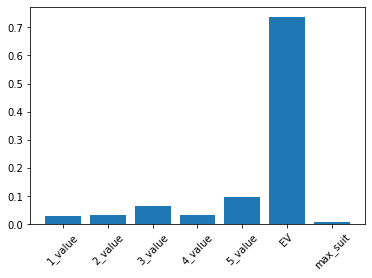

In [76]:
plt.bar(range(7), RFR.feature_importances_, tick_label = df_full_train.columns)
plt.xticks(rotation = 45)
plt.show()

In [81]:
test_input = np.asarray([0,4,5,6,12,.379183,3]).reshape(1,-1)
RFR.predict(test_input)

C:\Users\jeeva\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.50197792])

In [ ]:
df

In [17]:
df_cur_full = pd.read_csv("EV_full_cur_strength_correlations.txt")

In [18]:
df_cur_full

,1_value,2_value,3_value,4_value,5_value,EV,cur_strength,max_suit,win_rate
0,0,3,8,11,11,0.598156,1.852330,3,0.83796
1,0,0,0,2,5,0.743758,3.003860,3,0.21632
2,0,2,2,4,12,0.483846,1.163110,3,0.54616
3,0,1,3,7,11,0.350145,0.851562,3,0.39612
4,0,4,5,6,10,0.336299,0.773885,2,0.36404
...,...,...,...,...,...,...,...,...,...
19995,1,3,3,7,9,0.473816,1.237750,2,0.34064
19996,0,1,2,8,10,0.314353,0.775400,2,0.34124
19997,0,0,2,3,4,0.489648,1.003100,2,0.30396
19998,0,4,5,6,12,0.379183,0.927731,3,0.49884


In [19]:
df_cur_full_train = df_cur_full.drop(['win_rate'], axis = 1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_cur_full_train, df_cur_full.win_rate, test_size = 0.2)

In [46]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [47]:
LR.score(X_test, y_test)

0.8085529999826183

In [48]:
LR.coef_

array([-0.02442588, -0.00357289,  0.02717364,  0.00194571,  0.01913066,
        1.2409702 ,  0.00662273, -0.01114931])

In [49]:
RFR = RandomForestRegressor()

In [50]:
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
RFR.score(X_test, y_test)

0.9807441239238706

In [52]:
RFR.feature_importances_

array([0.01522981, 0.02914581, 0.03055866, 0.02599944, 0.08378727,
       0.25808955, 0.5482517 , 0.00893776])

In [30]:
df_cur_full_train

,1_value,2_value,3_value,4_value,5_value,EV,cur_strength,max_suit
0,0,3,8,11,11,0.598156,1.852330,3
1,0,0,0,2,5,0.743758,3.003860,3
2,0,2,2,4,12,0.483846,1.163110,3
3,0,1,3,7,11,0.350145,0.851562,3
4,0,4,5,6,10,0.336299,0.773885,2
...,...,...,...,...,...,...,...,...
19995,1,3,3,7,9,0.473816,1.237750,2
19996,0,1,2,8,10,0.314353,0.775400,2
19997,0,0,2,3,4,0.489648,1.003100,2
19998,0,4,5,6,12,0.379183,0.927731,3


In [58]:
df_cur_full_train.columns

Index(['1_value', '2_value', '3_value', '4_value', '5_value', 'EV',
       'cur_strength', 'max_suit'],
      dtype='object')

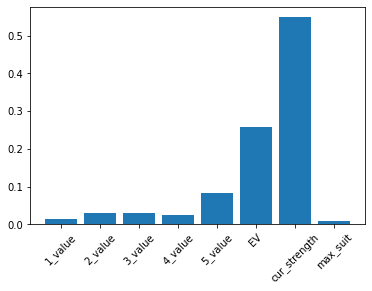

In [62]:
plt.bar(range(8), RFR.feature_importances_, tick_label = df_cur_full_train.columns)
plt.xticks(rotation = 45)
plt.show()

In [83]:
df_cur_full

,1_value,2_value,3_value,4_value,5_value,EV,cur_strength,max_suit,win_rate
0,0,3,8,11,11,0.598156,1.852330,3,0.83796
1,0,0,0,2,5,0.743758,3.003860,3,0.21632
2,0,2,2,4,12,0.483846,1.163110,3,0.54616
3,0,1,3,7,11,0.350145,0.851562,3,0.39612
4,0,4,5,6,10,0.336299,0.773885,2,0.36404
...,...,...,...,...,...,...,...,...,...
19995,1,3,3,7,9,0.473816,1.237750,2,0.34064
19996,0,1,2,8,10,0.314353,0.775400,2,0.34124
19997,0,0,2,3,4,0.489648,1.003100,2,0.30396
19998,0,4,5,6,12,0.379183,0.927731,3,0.49884


In [86]:
df_cur_noEV = df_cur_full.drop(['EV'], axis = 1)

In [87]:
df_cur_noEV

,1_value,2_value,3_value,4_value,5_value,cur_strength,max_suit,win_rate
0,0,3,8,11,11,1.852330,3,0.83796
1,0,0,0,2,5,3.003860,3,0.21632
2,0,2,2,4,12,1.163110,3,0.54616
3,0,1,3,7,11,0.851562,3,0.39612
4,0,4,5,6,10,0.773885,2,0.36404
...,...,...,...,...,...,...,...,...
19995,1,3,3,7,9,1.237750,2,0.34064
19996,0,1,2,8,10,0.775400,2,0.34124
19997,0,0,2,3,4,1.003100,2,0.30396
19998,0,4,5,6,12,0.927731,3,0.49884


In [88]:
df_cur_noEV_train = df_cur_noEV.drop(['win_rate'], axis = 1)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(df_cur_noEV_train, df_cur_noEV.win_rate, test_size = 0.2)

In [91]:
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [92]:
RFR.score(X_test, y_test)

0.980221403675887

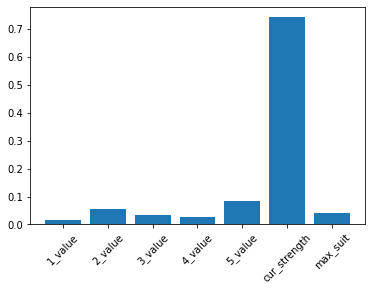

In [93]:
plt.bar(range(7), RFR.feature_importances_, tick_label = df_cur_noEV_train.columns)
plt.xticks(rotation = 45)
plt.show()